In [ ]:
red neuronal para extraer texto escrito a mano 

In [4]:
#pip install tensorflow

In [243]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

# Definir parámetros configurables
epochs = 50
batch_size = 90
model_filename = 'modelo_reconocimiento_texto.keras'

# Función para cargar tus datos de entrenamiento y validación
def cargar_datos_entrenamiento():
    # Cargar datos de entrenamiento desde un archivo CSV (ajusta la ruta y el formato según tus datos)
    df = pd.read_excel(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento.xlsx")
    
    # Redimensionar todas las imágenes a 28x28 píxeles
    imagenes = [np.array(Image.open(imagen_path).resize((28, 28))) for imagen_path in df['ruta'].values]
    
    # Convertir las imágenes en matrices NumPy y normalizarlas
    imagenes = np.array(imagenes) / 255.0
    
    etiquetas = df['etiqueta'].values
    
    return imagenes, etiquetas

def cargar_datos_validacion():
    # Cargar datos de validación desde un archivo CSV (ajusta la ruta y el formato según tus datos)
    df = pd.read_excel(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento.xlsx")
    
    # Redimensionar todas las imágenes a 28x28 píxeles
    imagenes = [np.array(Image.open(imagen_path).resize((28, 28))) for imagen_path in df['ruta'].values]
    
    # Convertir las imágenes en matrices NumPy y normalizarlas
    imagenes = np.array(imagenes) / 255.0
    
    etiquetas = df['etiqueta'].values
    
    return imagenes, etiquetas

# Función para construir el modelo
def construir_modelo():
    # Define un modelo secuencial
    model = keras.Sequential()

    # Capa de entrada: aplanar la imagen de 28x28 píxeles
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    
    # Capa oculta 3: 32 neuronas, función de activación ReLU
    model.add(keras.layers.Dense(10, activation='relu'))

    

    # Capa oculta 3: 32 neuronas, función de activación ReLU
    model.add(keras.layers.Dense(32, activation='relu'))

    # Capa de salida: 10 neuronas (una para cada posible dígito), función de activación softmax
    model.add(keras.layers.Dense(4, activation='softmax'))

    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Función para entrenar el modelo
def entrenar_modelo(x_train, y_train, x_val, y_val):
    # Entrena el modelo con los datos de entrenamiento y valida en los datos de validación
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
    
    return model

if __name__ == "__main__":
    # Cargar tus datos de entrenamiento y validación
    x_train, y_train = cargar_datos_entrenamiento()
    x_val, y_val = cargar_datos_validacion()

    # Construir el modelo
    model = construir_modelo()

    # Entrenar el modelo con datos de entrenamiento y validación
    model = entrenar_modelo(x_train, y_train, x_val, y_val)

    # Guardar el modelo entrenado
    model.save(model_filename)

    # Realizar predicciones en una imagen de prueba
   # imagen_prueba = Image.open(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento2\B\B_1310995782319.png")
   # imagen_prueba = imagen_prueba.resize((28, 28))  # Redimensionar la imagen a (28, 28)
   # imagen_prueba = np.array(imagen_prueba) / 255.0  # Normalizar la imagen
  #  etiqueta_predicha = np.argmax(model.predict(np.expand_dims(imagen_prueba, axis=0)))

   # print(f'Etiqueta predicha: {etiqueta_predicha}')


Epoch 1/50


ValueError: in user code:

    File "C:\Users\pc\anaconda3\envs\marsh1\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\pc\anaconda3\envs\marsh1\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pc\anaconda3\envs\marsh1\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\pc\anaconda3\envs\marsh1\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\pc\anaconda3\envs\marsh1\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\pc\anaconda3\envs\marsh1\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_74' (type Sequential).
    
    Input 0 of layer "dense_230" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 28, 28)
    
    Call arguments received by layer 'sequential_74' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
      • training=True
      • mask=None


In [242]:
from PIL import Image
import numpy as np

# Cargar la imagen que deseas clasificar
#imagen_prueba = Image.open(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento2\B\B_1310995782319.png")  # Reemplaza con la ruta de tu imagen
#imagen_prueba = Image.open(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento2\A\A_1310995379423.png")  # Reemplaza con la ruta de tu imagen
imagen_prueba = Image.open(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento2\C\C_1311019615311.png")  # Reemplaza con la ruta de tu imagen


imagen_prueba = imagen_prueba.resize((28, 28))  # Redimensionar la imagen a (28x28)
imagen_prueba = np.array(imagen_prueba) / 255.0  # Normalizar la imagen

# Utilizar el modelo entrenado para hacer una predicción en la imagen
etiqueta_predicha = np.argmax(model.predict(np.expand_dims(imagen_prueba, axis=0)))

print(f'Etiqueta predicha: {etiqueta_predicha}')


1/1 [==============================] - 0s 26ms/step
Etiqueta predicha: 2


In [ ]:
### otro proyecto

In [315]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Users\pc\Documents\tesseract.exe" 
# Abre la imagen
img = Image.open(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento\1.png")

# Utiliza Tesseract para extraer texto
texto_extraido = pytesseract.image_to_string(img)

# Imprime el texto extraído
texto_extraido


'| jdheuna Vallejo Range\n'

In [315]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Users\pc\Documents\tesseract.exe" 
# Abre la imagen
img = Image.open(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento\1.png")

# Utiliza Tesseract para extraer texto
texto_extraido = pytesseract.image_to_string(img)

# Imprime el texto extraído
texto_extraido


'| jdheuna Vallejo Range\n'

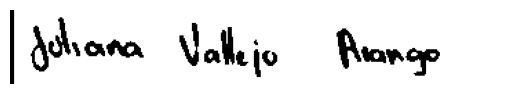

In [323]:
import cv2
import matplotlib.pyplot as plt

# Carga la imagen original
img = cv2.imread(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento\1.png")

# Realiza las operaciones de preprocesamiento
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_smooth = cv2.GaussianBlur(img_grayscale, (5, 5), 0)
_, img_binary = cv2.threshold(img_smooth, 4, 55, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Muestra la imagen en la celda de la notebook
plt.imshow(img_binary, cmap='gray')
plt.axis('off')  # Desactiva los ejes si lo deseas
plt.show()



In [404]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Users\pc\Documents\tesseract.exe" 
# Abre la imagen
img = img_dilated

# Utiliza Tesseract para extraer texto
texto_extraido = pytesseract.image_to_string(img)

# Imprime el texto extraído
texto_extraido

'jhe \\ alle ie Range\n'

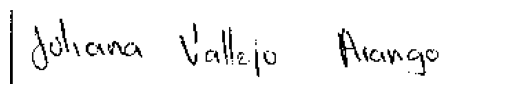

In [403]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Carga la imagen original
img = cv2.imread(r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento\1.png", cv2.IMREAD_GRAYSCALE)

# Realiza las operaciones de preprocesamiento
_, img_binary = cv2.threshold(img, 150, 99000, cv2.THRESH_BINARY)

# Aplicar operación de dilatación para rellenar áreas vacías de las letras
kernel = np.ones((1, 1), np.uint8)
img_dilated = cv2.dilate(img_binary, kernel, iterations=1)

# Muestra la imagen dilatada en la celda de la notebook
plt.imshow(img_dilated, cmap='gray')
plt.axis('off')  # Desactiva los ejes si lo deseas
plt.show()


In [1]:
#pip install easyocr

In [ ]:
import easyocr

In [1]:
import easyocr

# Configura EasyOCR con los idiomas que deseas reconocer
reader = easyocr.Reader(['en'])  # Reconocimiento en inglés

# Carga una imagen con texto escrito a mano
image_path = r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento\1.png"
results = reader.readtext(image_path)

# Itera a través de los resultados y muestra el texto y la ubicación
#for (bbox, text, prob) in results:
    
    print(results)



IndentationError: unexpected indent (587747395.py, line 13)

In [ ]:
import easyocr

# Configura EasyOCR con los idiomas que deseas reconocer
reader = easyocr.Reader(['en'])  # Reconocimiento en inglés

# Carga una imagen con texto escrito a mano
image_path = r"C:\Users\pc\OneDrive\Escritorio\OC_pdf\entrenamiento\1.png"
results = reader.readtext(image_path)

# Crear una lista para almacenar el texto extraído
extracted_text = []

# Itera a través de los resultados y agrega el texto a la lista
for (bbox, text, prob) in results:
    extracted_text.append(text)

# Convierte la lista en una cadena
extracted_text_str = ' '.join(extracted_text)

# Muestra el texto extraído en una celda de Jupyter Notebook
from IPython.display import display, Markdown
display(Markdown(f'Texto Extraído: {extracted_text_str}'))
